# Visualisations

####  Goals
* something

#### Output
* 
* 

In [1]:
cd ..

/home/jovyan/dsi/CAPSTONE


In [2]:
%run __init__.py
%matplotlib inline

In [3]:
commute_df = pd.read_pickle('./data/no_null_commute_df.pkl')
commute_df.head()

Survey_Cycle  response_rate  num_employees  VMT_employee  goal_vmt  \
0    2007/2008           73.2          183.0           7.0       5.7   
1    2009/2010           73.0          240.0           6.6       5.7   
2    2011/2012           52.8          436.0           5.3       5.7   
3    2013/2014           72.2          650.0           5.2       5.7   
4    2009/2010           78.0          337.0           2.5       0.0   

   total_vmt  total_goal_vmt  ndat_rate  goal_ndat_rate_worksite_only  \
0      763.0          625.66       42.8                          48.8   
1     1141.8            0.00       49.5                          48.8   
2     1219.0            0.00       66.7                          48.8   
3     2438.8            0.00       68.9                          48.8   
4      390.0            0.00       82.8                           0.0   

   total_goal_ndat_trips                  ...                   \
0                  264.5                  ...                    
1                    0.0                  ...                    
2                    0.0                  ...                    
3                    0.0                  ...                    
4                    0.0                  ...                    

   yearly_cost_meeting_program_requirements  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   yearly_cost_of_financial_incentives_subsidies_to_employees  \
0                                                0.0            
1                                                0.0            
2                                                0.0            
3                                                0.0            
4                                                0.0            

   yearly_cost_of_facilities  yearly_cost_other  explanation_of_other_cost  \
0                        0.0                0.0                         NA   
1                        0.0                0.0                         NA   
2                        0.0                0.0                         NA   
3                        0.0                0.0                         NA   
4                        0.0                0.0                         NA   

   employer_applied_for_state_tax_credits_for_supporting_employee_commute_alternatives  \
0                                            Unknown                                     
1                                            Unknown                                     
2                                            Unknown                                     
3                                            Unknown                                     
4                                            Unknown                                     

   What are your worksite's transportation program priorities for the next 6 months?1  \
0                             Keep parking cost down                                    
1                             Keep parking cost down                                    
2                             Keep parking cost down                                    
3                             Keep parking cost down                                    
4                         Audit current user program                                    

   What are your worksite's transportation program priorities for the next 6 months?2  \
0                                 encourage orca use                                    
1                                 encourage orca use                                    
2                                 encourage orca use                                    
3                                 encourage orca use                                    
4                                Promote CTR program                 

### Initial Plots

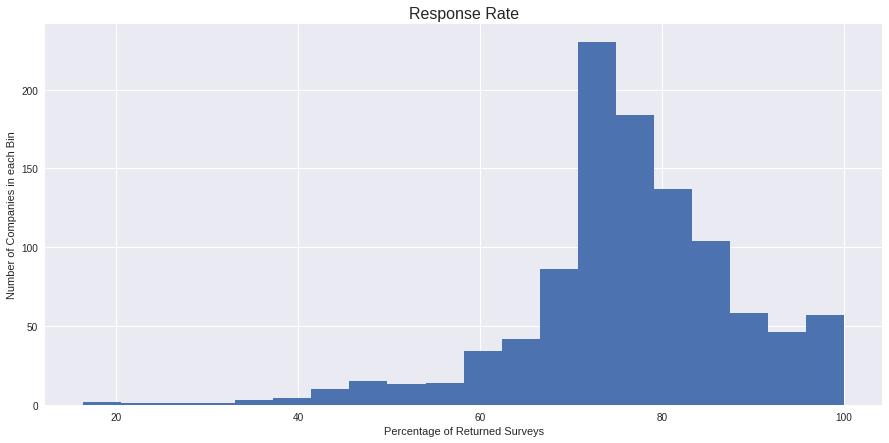

In [5]:
fig = plt.figure(figsize=(15,7))
plt.hist(commute_df['response_rate'], bins=20)
plt.title('Response Rate', size=16)
plt.xlabel('Percentage of Returned Surveys')
plt.ylabel('Number of Companies in each Bin')
# plt.savefig('./figures/response_rate.png')
# plt.savefig('./figures/response_rate.pdf')

#### Note: Tukey's method to test to see if I should delete any of those responses more than 1.5x the IQR.

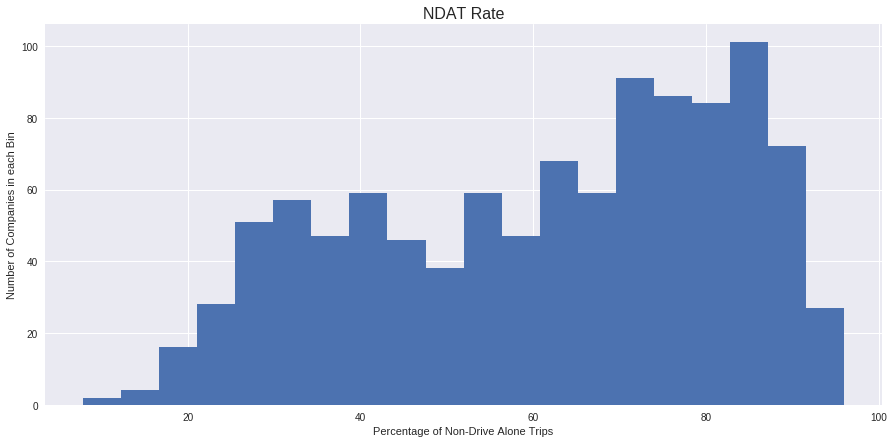

In [6]:
fig = plt.figure(figsize=(15,7))
plt.hist(commute_df['ndat_rate'], bins=20)
plt.title('NDAT Rate', size=16)
plt.xlabel('Percentage of Non-Drive Alone Trips')
plt.ylabel('Number of Companies in each Bin')
# plt.savefig('./figures/ndat_rate.png')
# plt.savefig('./figures/ndat_rate.pdf')

## NUMERICAL PLOTS

In [7]:
commute_stats_df = pd.read_pickle('./data/clean_commute_stats_df.pkl')

In [11]:
fig = plt.figure(figsize=(50,250))
# plt.title('Numerical Features', size=40)

for i, num_col in enumerate(commute_stats_df.index):
    fig.add_subplot(30,2,1+i)
    sns.distplot(commute_df[num_col])
    plt.xlabel(num_col, size=30)
    
    mean_value = commute_df[num_col].mean()
    plt.axvline(mean_value, c='red')
    
    median_value = commute_df[num_col].median()
    plt.axvline(median_value, c='black')
    
plt.tight_layout()
plt.savefig('./figures/numerical_subplots.png')
plt.savefig('./figures/numerical_subplots.pdf')


#### Numerical Features against NDAT Rate

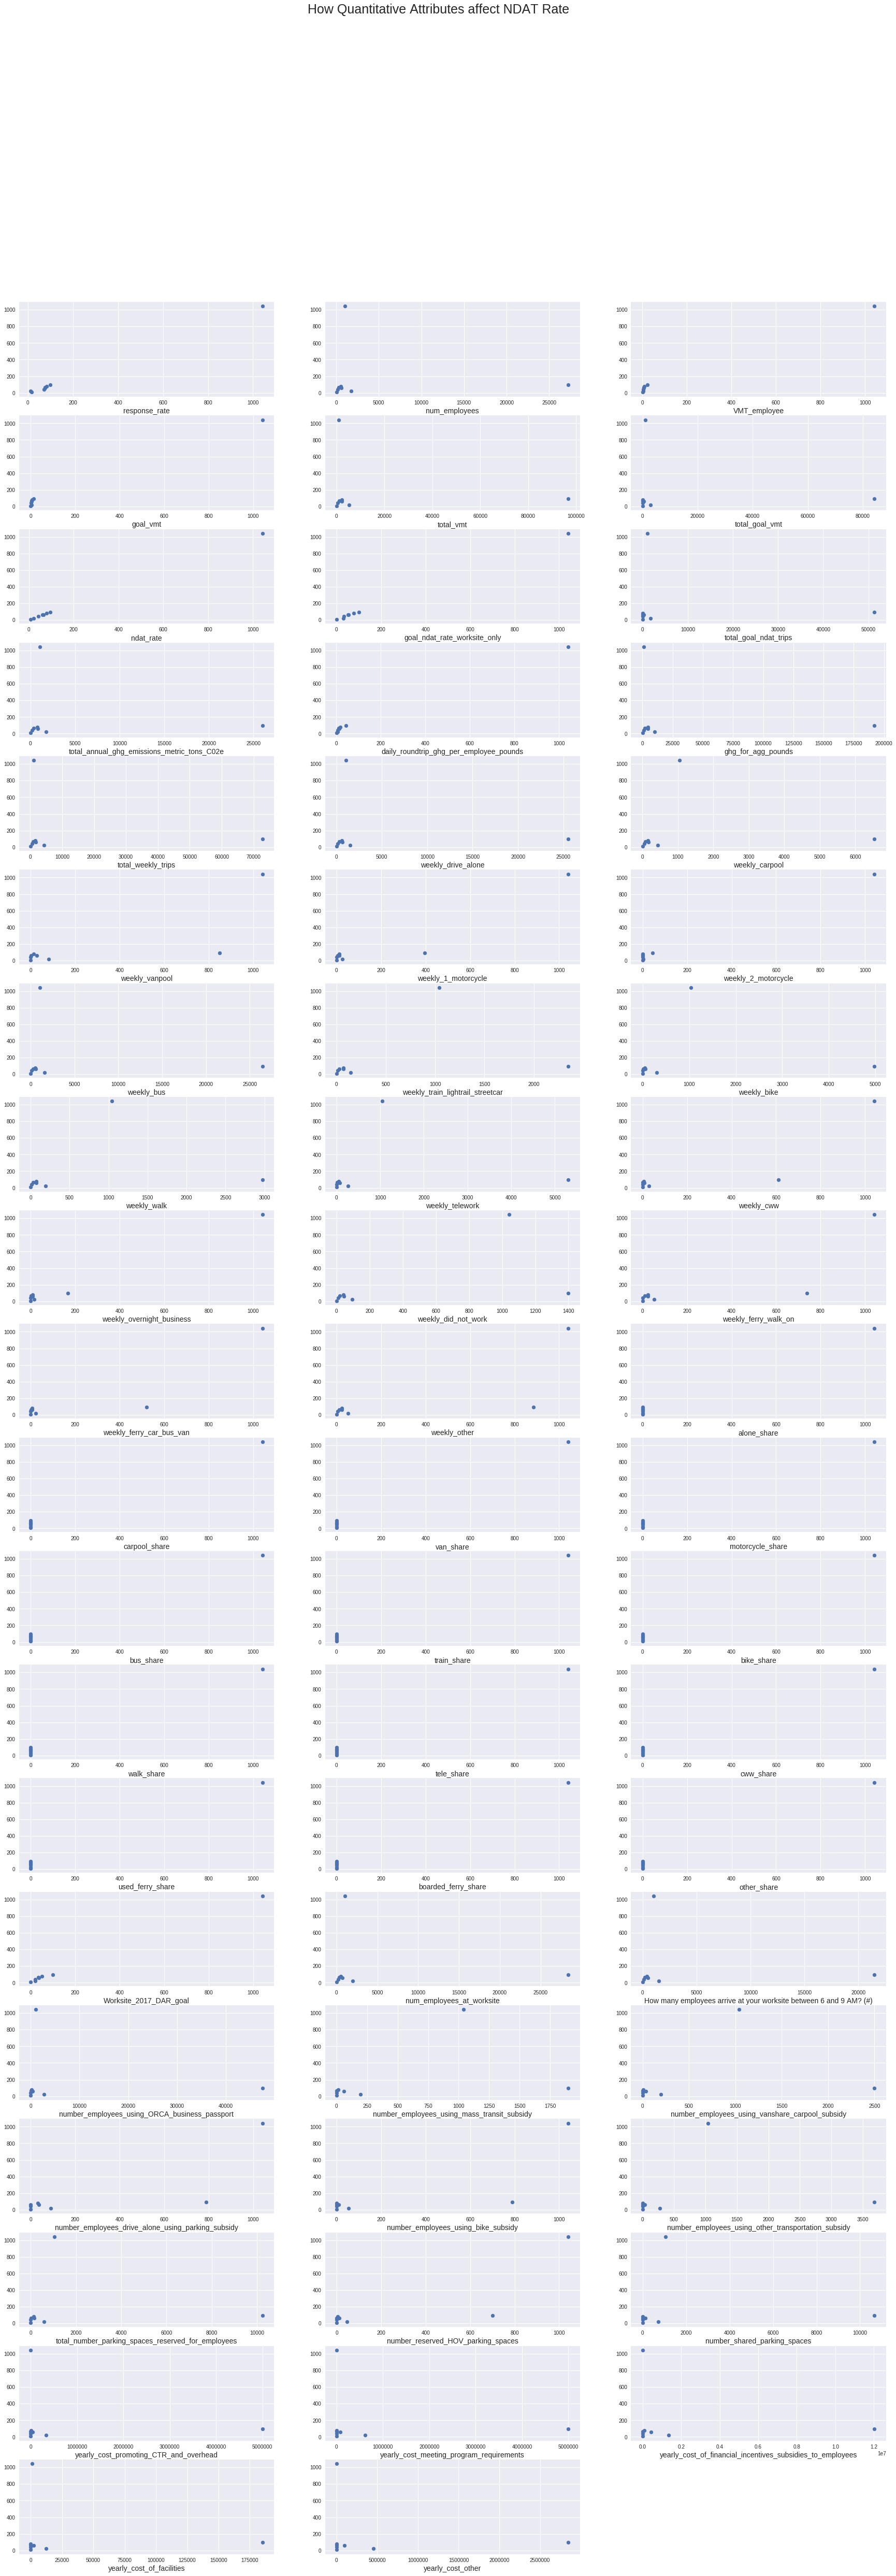

In [28]:
fig = plt.figure(figsize=(30, 80))
plt.suptitle("How Quantitative Attributes affect NDAT Rate", fontsize=25)

for i, col in enumerate(commute_stats_df.T.columns):
    fig.add_subplot(20, 3, 1+i)
    plt.scatter(x=commute_stats_df.T[col], y=commute_stats_df.T['ndat_rate'])
    plt.xlabel("{}".format(col), fontsize=14)

## CATEGORICAL PLOTS

In [12]:
commute_dtypes_df = pd.read_pickle('./data/commute_dtypes')

In [13]:
categorical_columns = list(commute_dtypes_df.loc[commute_dtypes_df['column_dtypes'] == 'category'].T.columns)

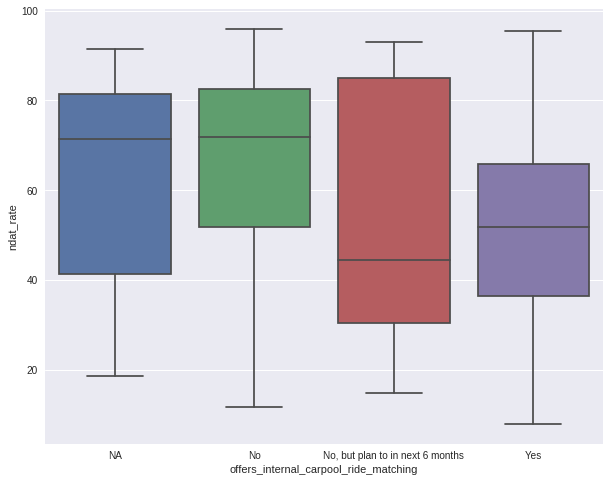

In [16]:
fig = plt.figure(figsize=(10,8))

_ = sns.boxplot(commute_df['offers_internal_carpool_ride_matching'], commute_df['ndat_rate'])

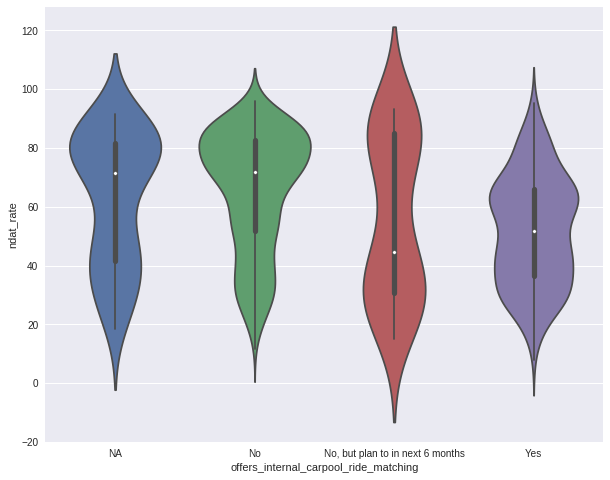

In [17]:
fig = plt.figure(figsize=(10,8))

_ = sns.violinplot(commute_df['offers_internal_carpool_ride_matching'], commute_df['ndat_rate'])

In [29]:
fig = plt.figure(figsize=(50,250))
# plt.title('Numerical Features', size=40)

for i, col in enumerate(categorical_columns):
    fig.add_subplot(30,2,1+i)
    sns.boxplot(commute_df[col], commute_df['ndat_rate'])
#     plt.xlabel(num_col, size=30)
    
#     mean_value = commute_df[num_col].mean()
#     plt.axvline(mean_value, c='red')
    
#     median_value = commute_df[num_col].median()
#     plt.axvline(median_value, c='black')
    
# plt.tight_layout()
# plt.savefig('./figures/numerical_subplots.png')
# plt.savefig('./figures/numerical_subplots.pdf')

/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


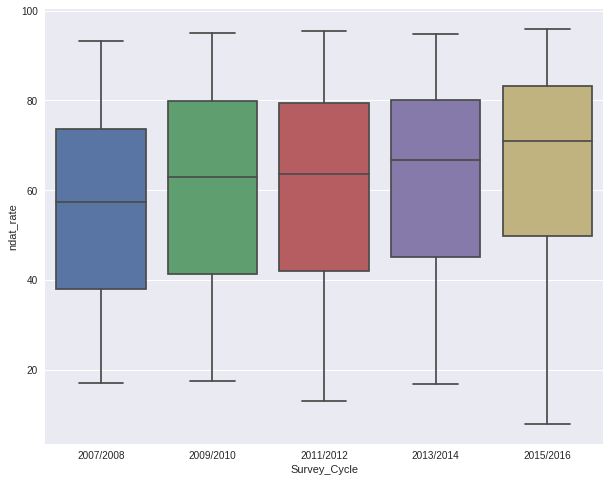

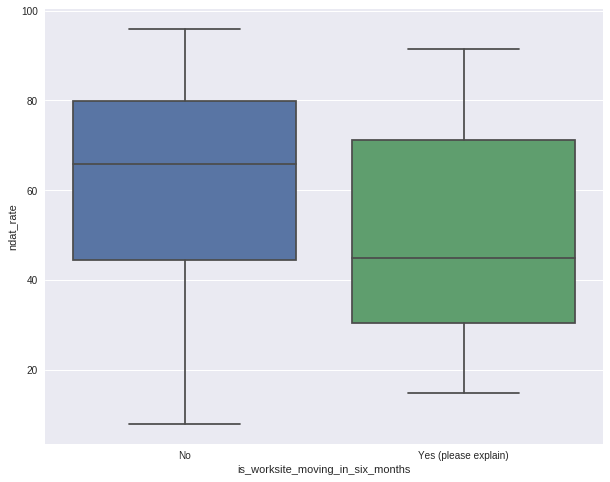

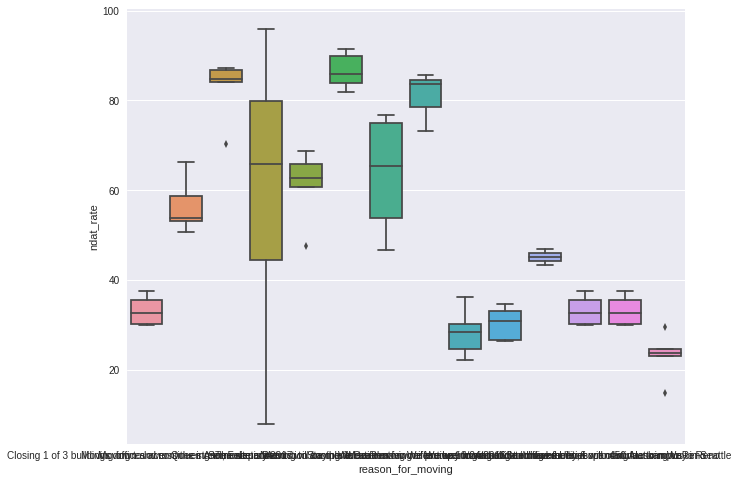

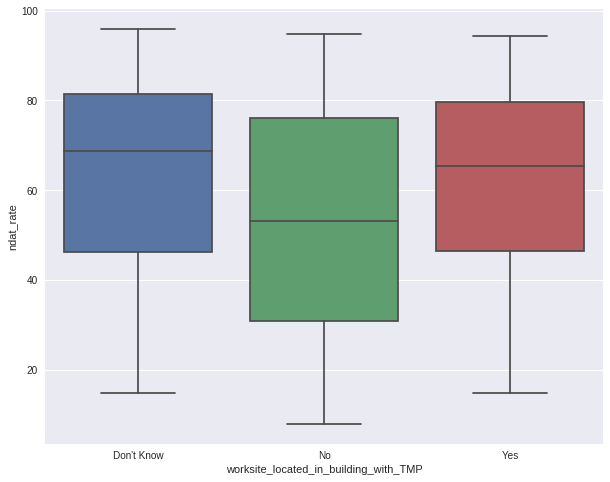

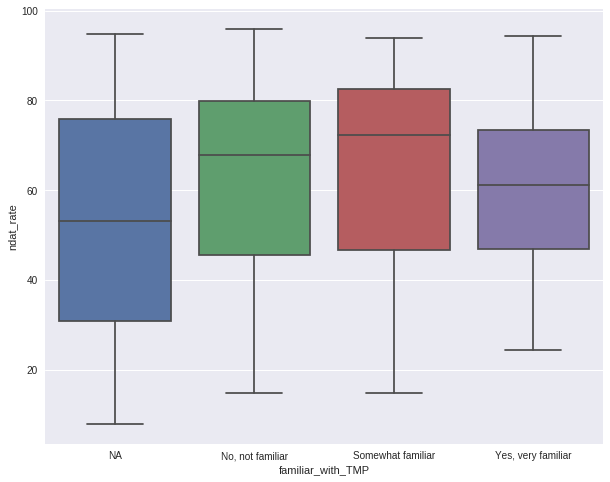

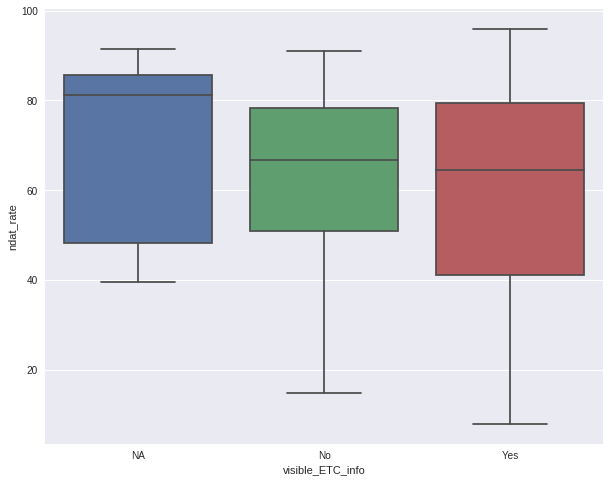

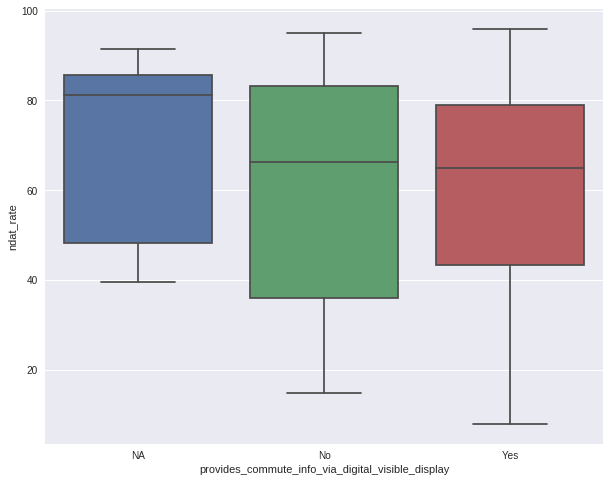

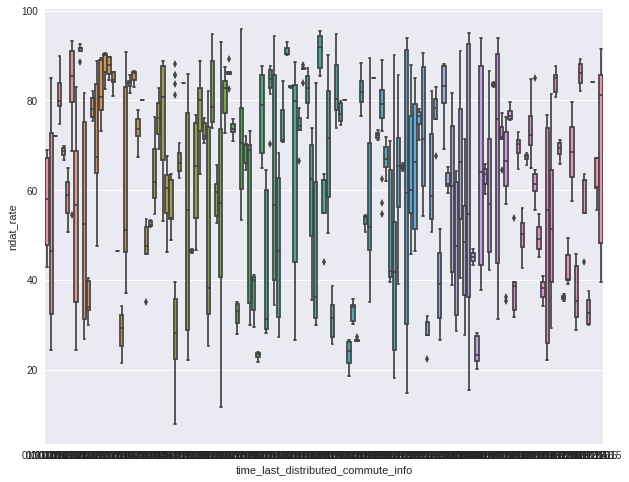

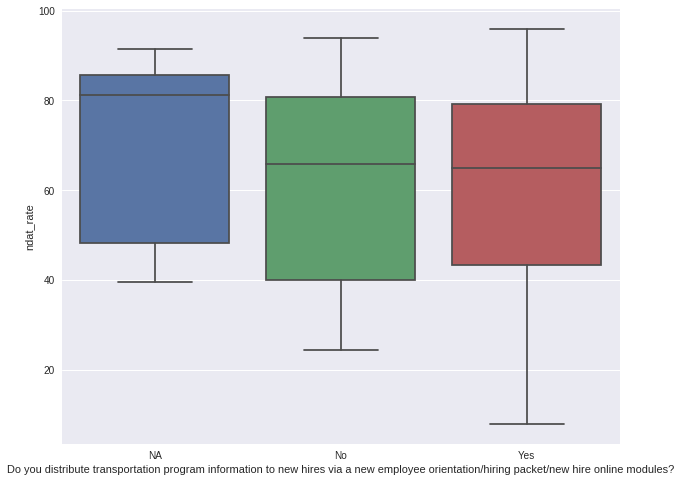

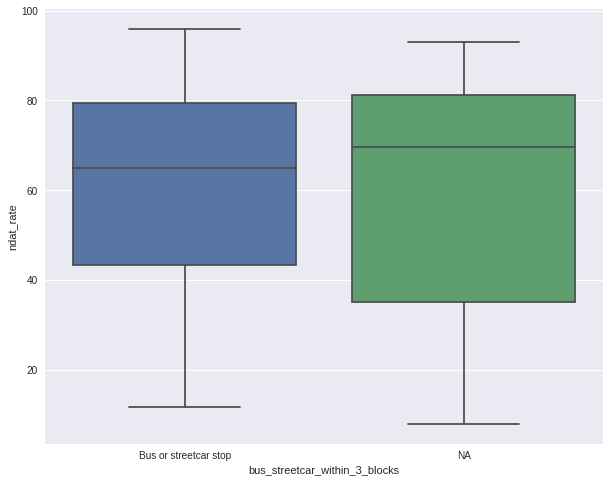

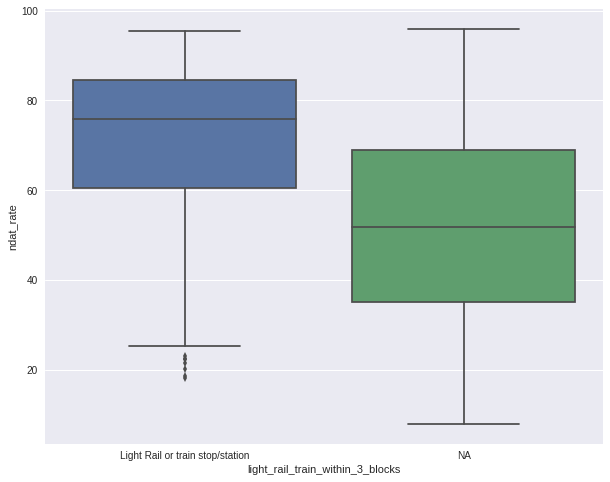

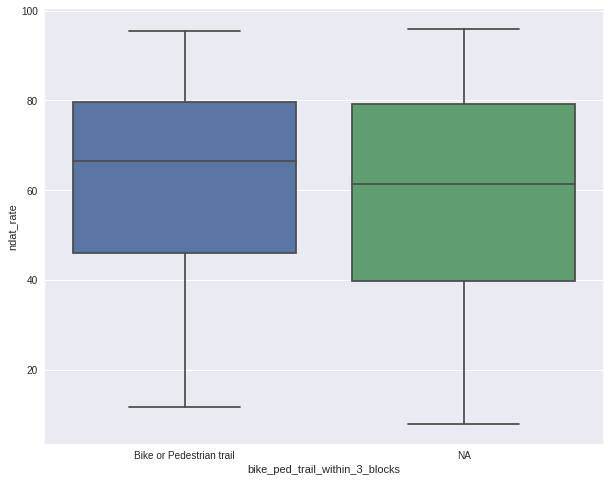

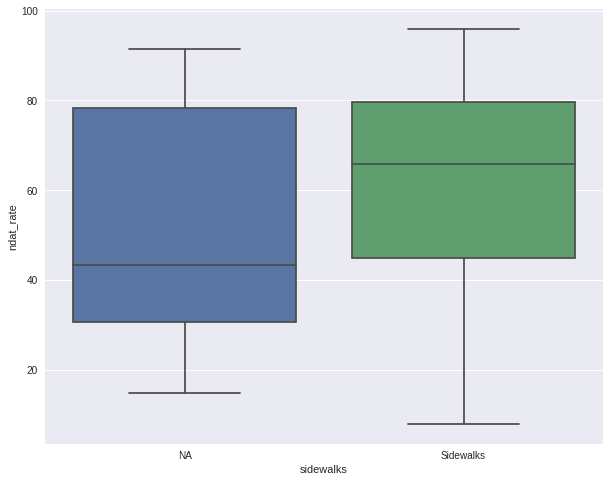

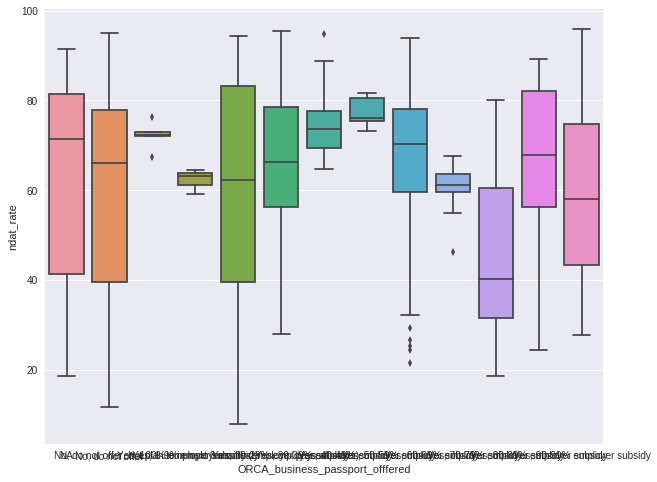

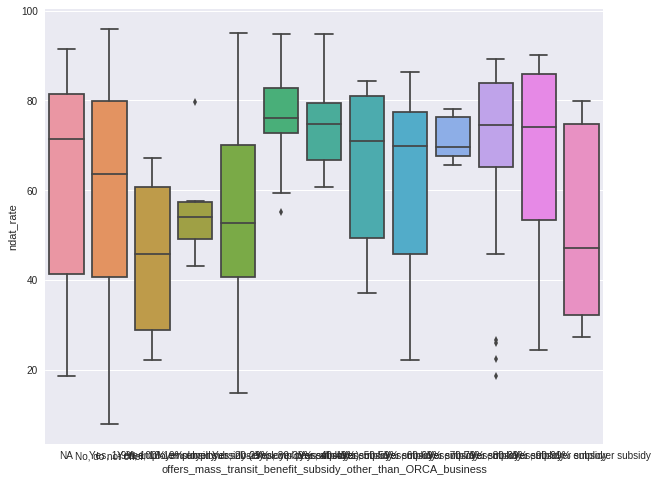

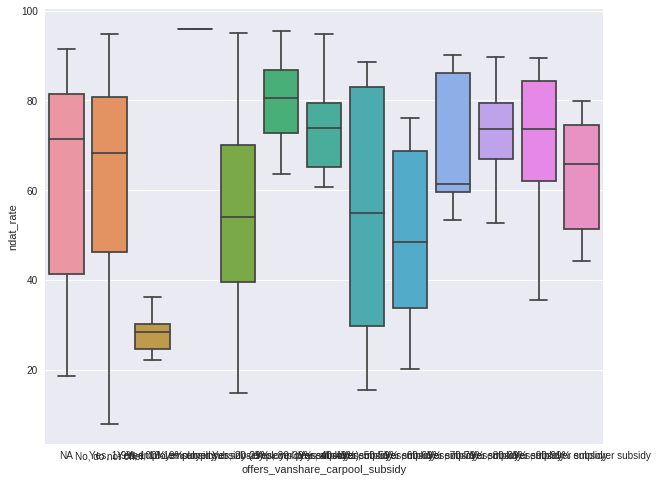

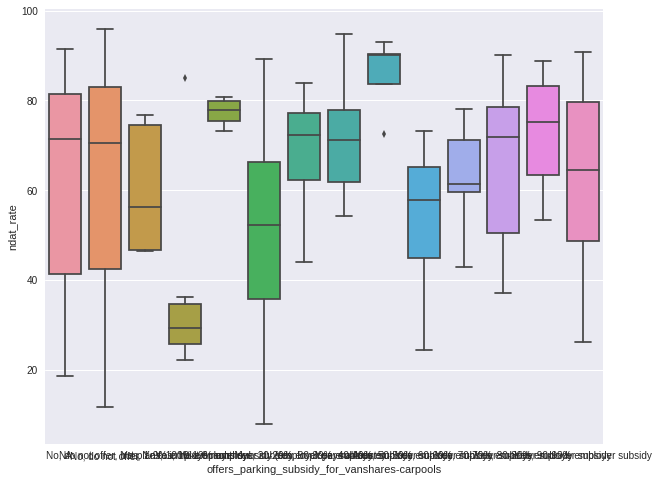

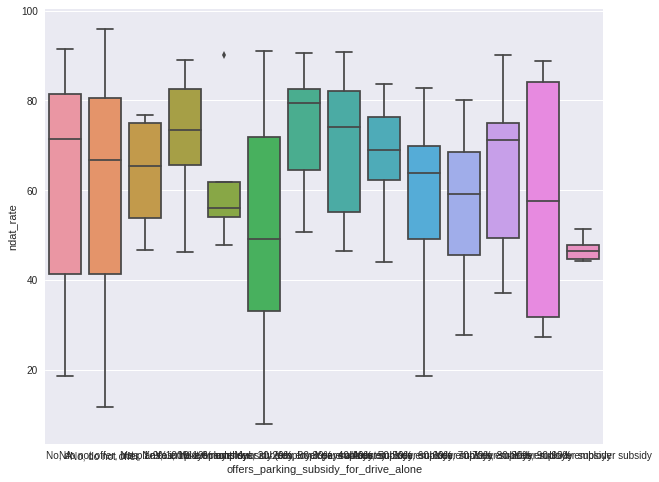

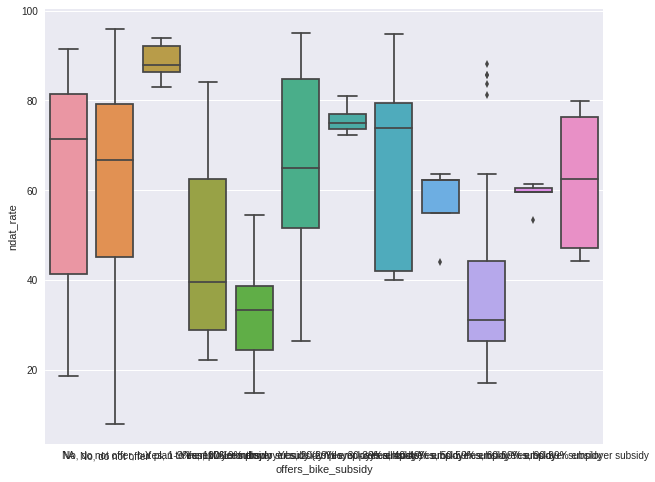

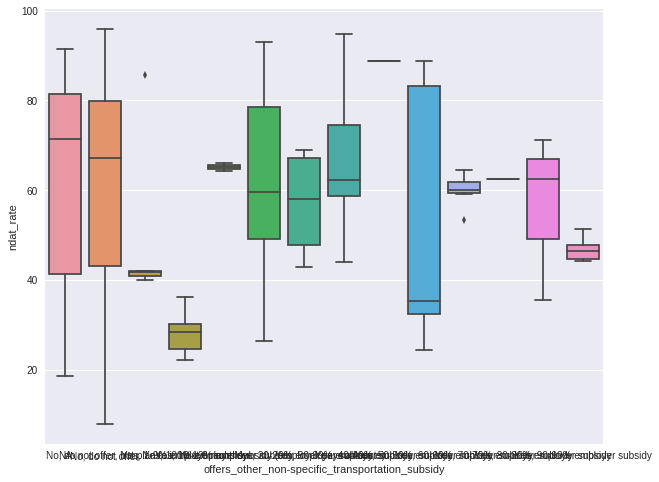

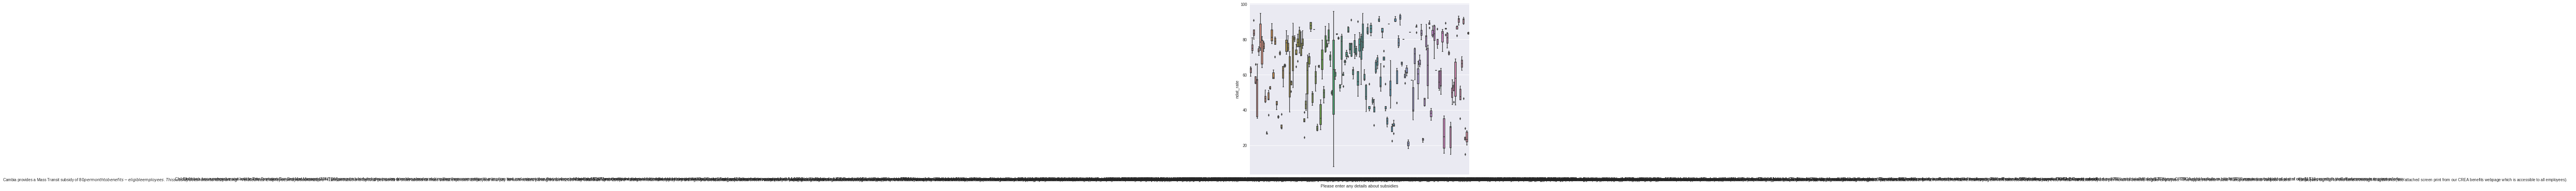

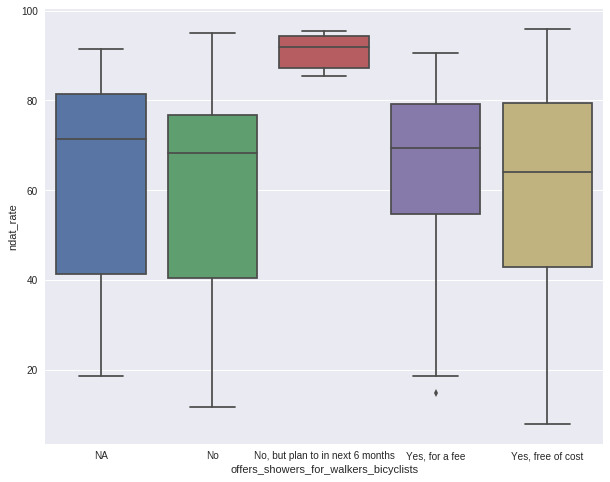

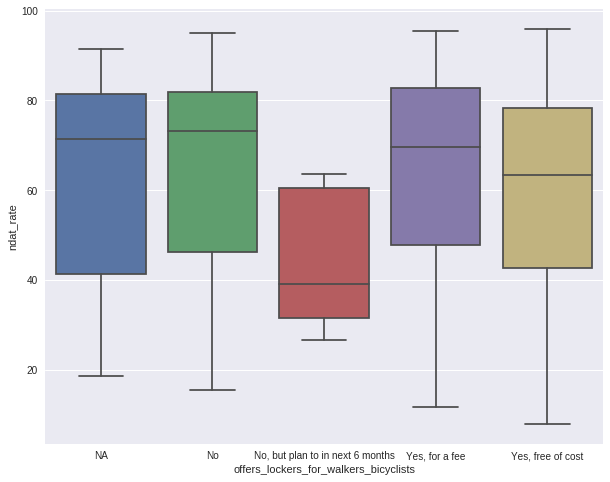

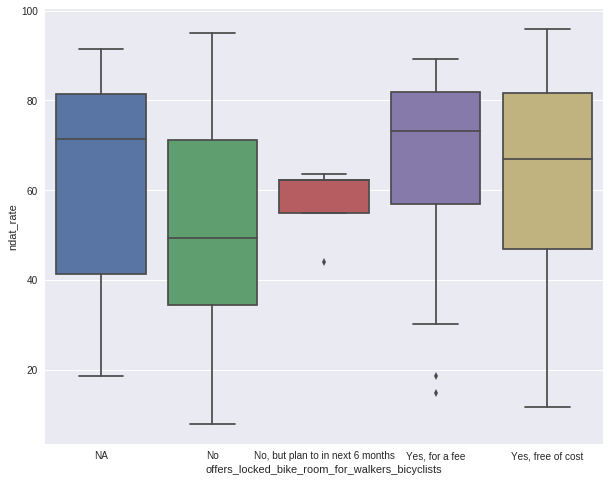

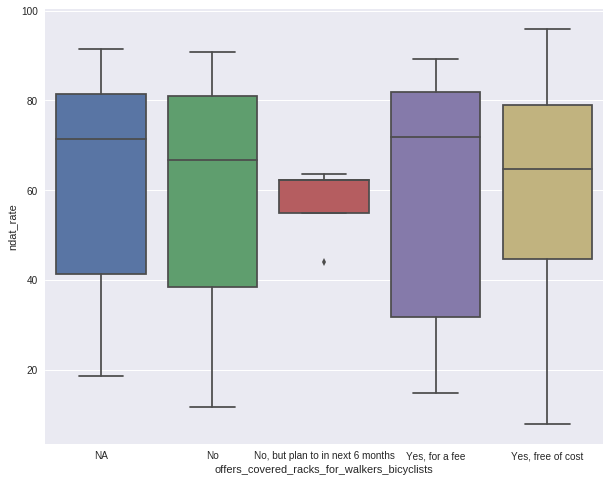

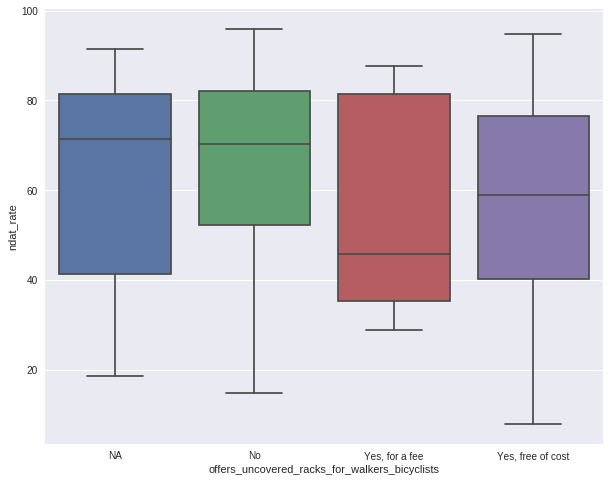

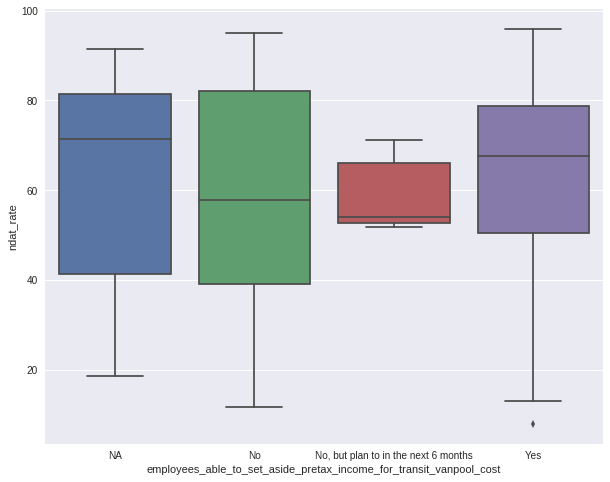

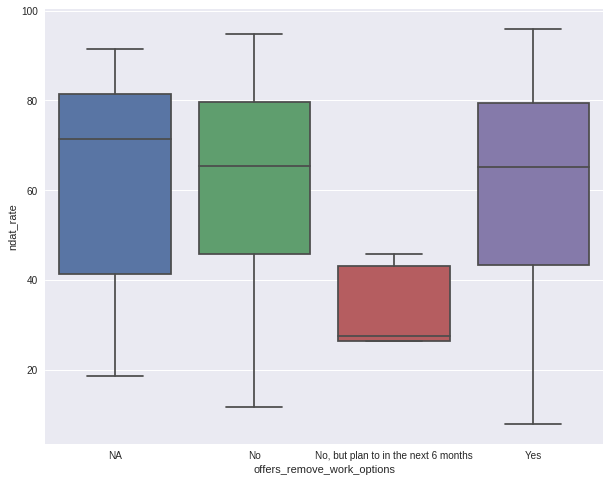

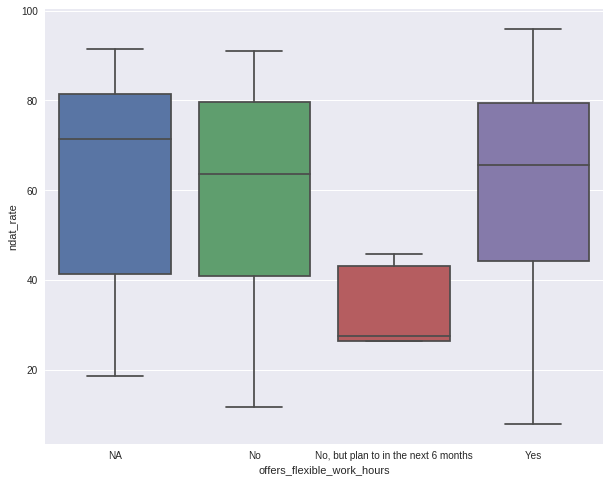

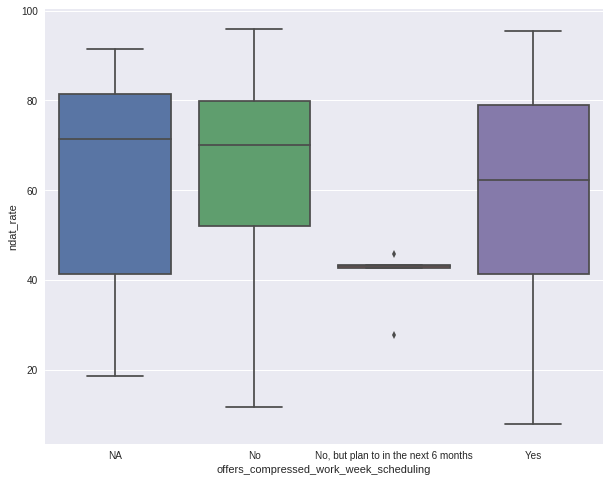

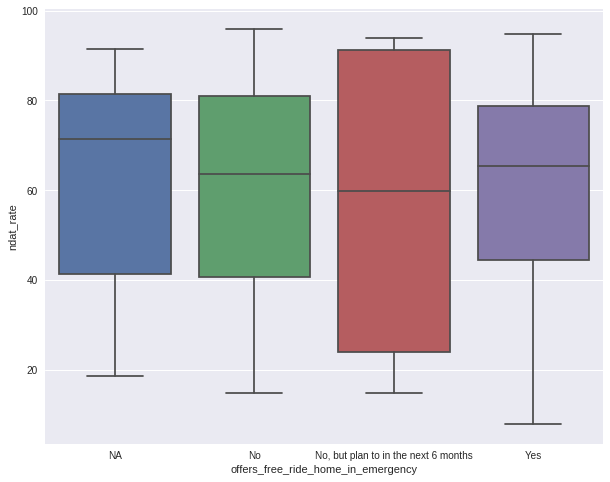

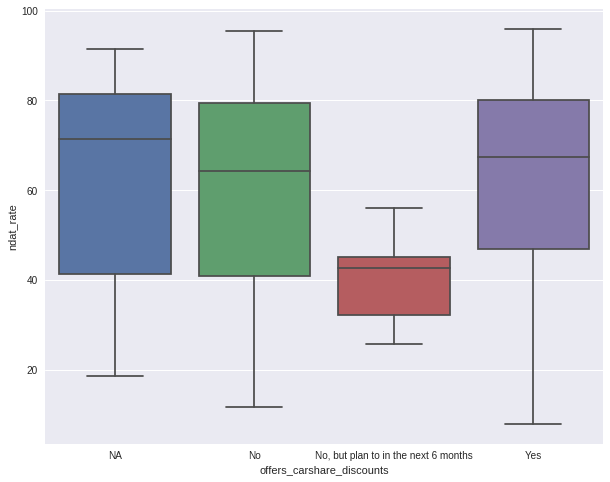

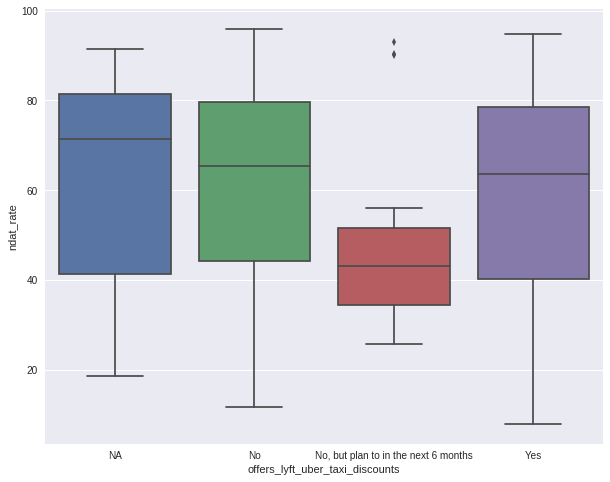

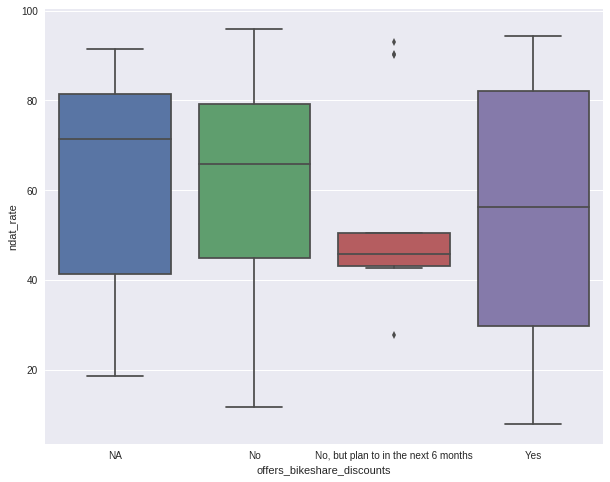

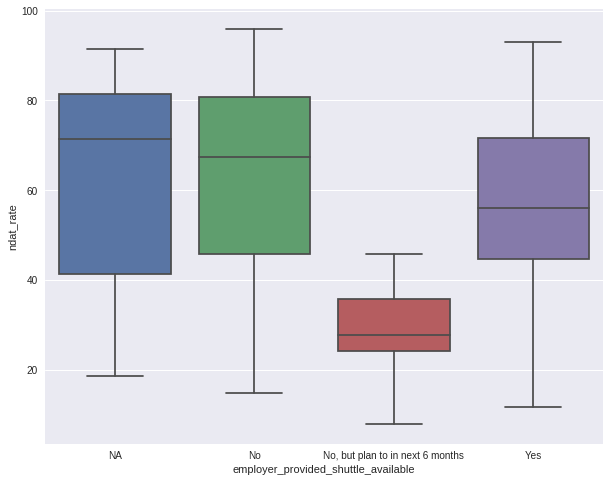

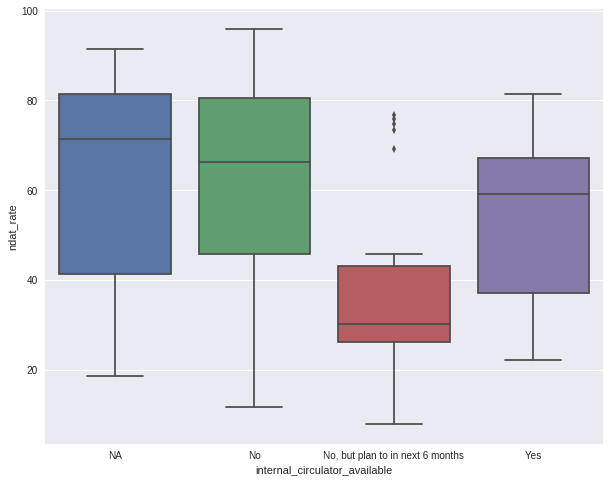

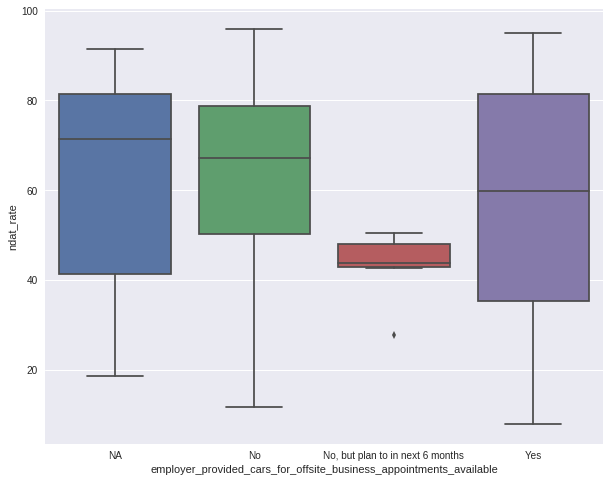

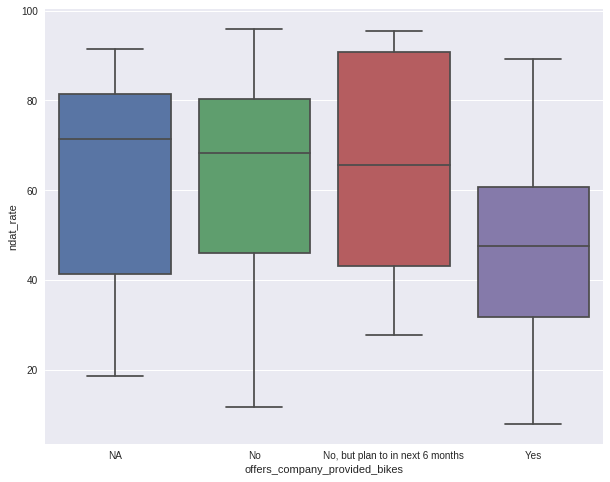

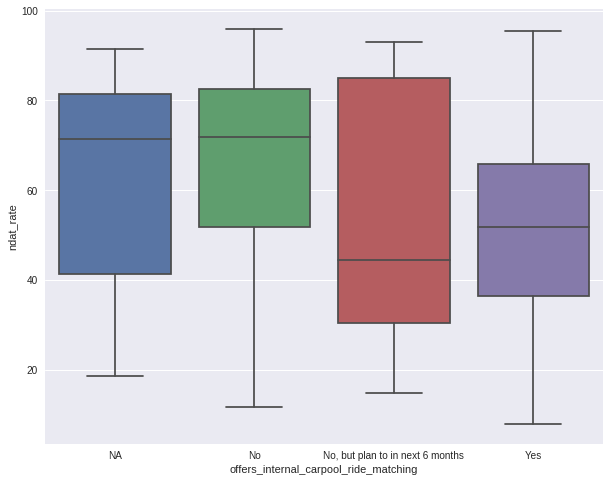

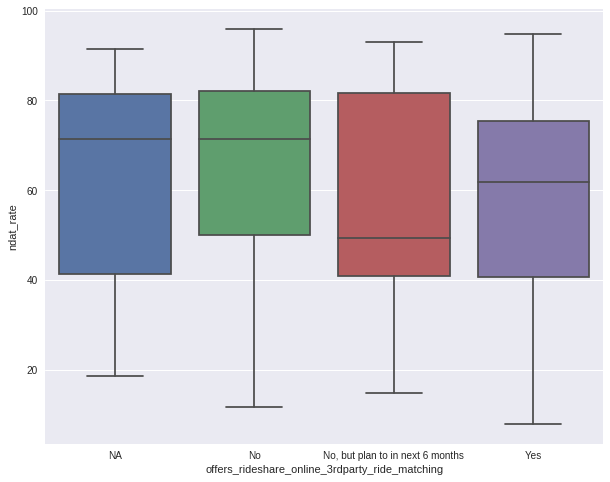

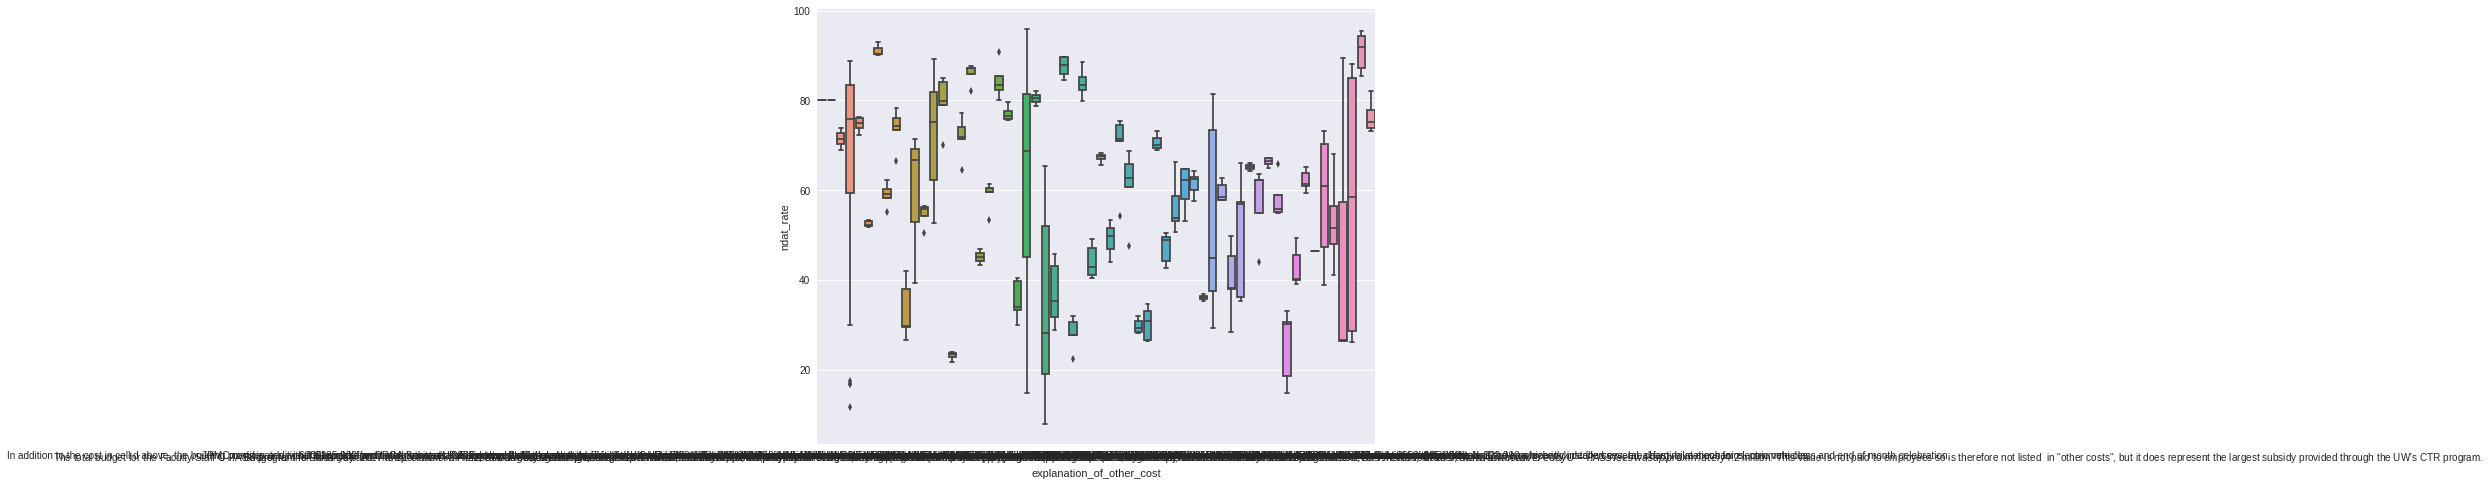

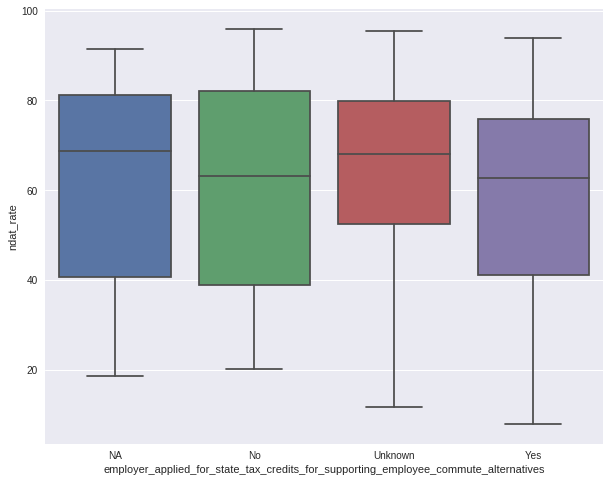

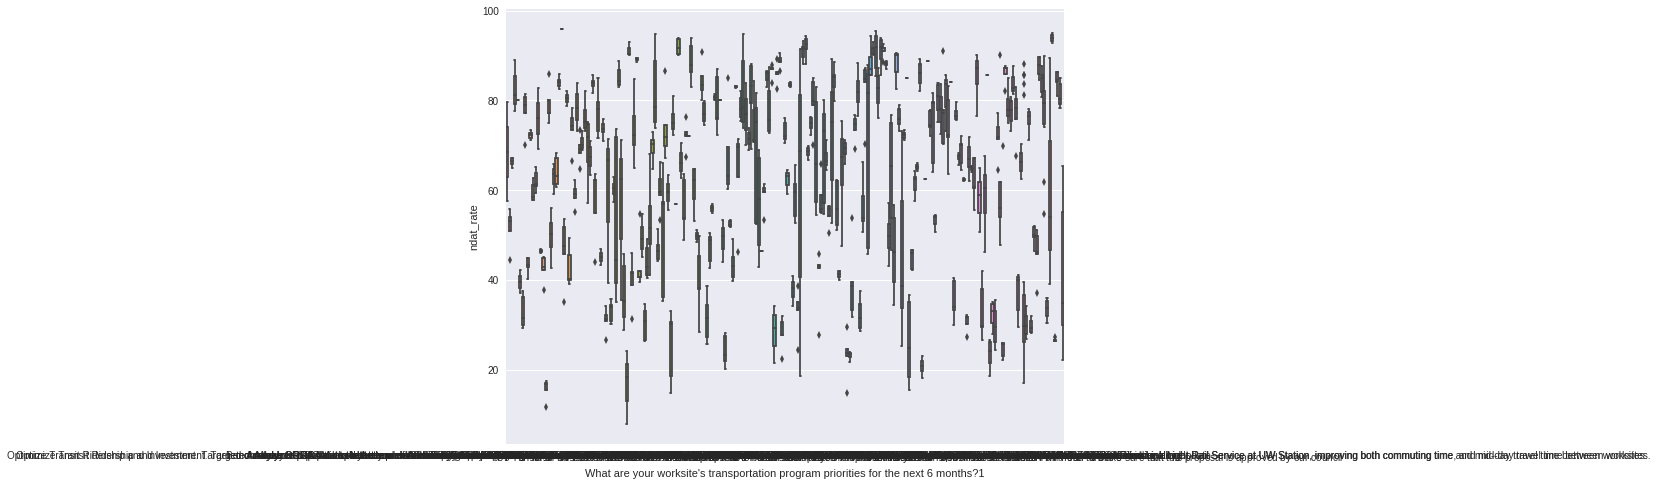

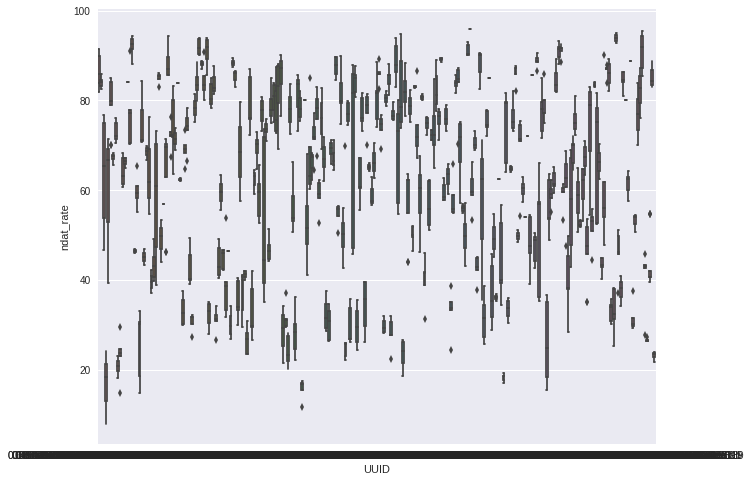

In [20]:
for col in categorical_columns:
    fig = plt.figure(figsize=(10,8))
    _ = sns.boxplot(commute_df[col], commute_df['ndat_rate'])    

#### Heat Map showing Correlation between Features

In [30]:
commute_corr = commute_df.corr()
commute_corr

response_rate  \
response_rate                                            1.000000   
num_employees                                           -0.158024   
VMT_employee                                            -0.144955   
goal_vmt                                                -0.104989   
total_vmt                                               -0.134856   
total_goal_vmt                                          -0.033159   
ndat_rate                                                0.120995   
goal_ndat_rate_worksite_only                             0.110413   
total_goal_ndat_trips                                   -0.021972   
total_annual_ghg_emissions_metric_tons_C02e             -0.202681   
daily_roundtrip_ghg_per_employee_pounds                 -0.145528   
ghg_for_agg_pounds                                      -0.134159   
total_weekly_trips                                      -0.119545   
weekly_drive_alone                                      -0.131240   
weekly_carpool                                          -0.115578   
weekly_vanpool                                          -0.077322   
weekly_1_motorcycle                                     -0.124313   
weekly_2_motorcycle                                     -0.018907   
weekly_bus                                              -0.094967   
weekly_train_lightrail_streetcar                        -0.070042   
weekly_bike                                             -0.115383   
weekly_walk                                             -0.110666   
weekly_telework                                         -0.101304   
weekly_cww                                              -0.036138   
weekly_overnight_business                                0.030040   
weekly_did_not_work                                     -0.039218   
weekly_ferry_walk_on                                    -0.062913   
weekly_ferry_car_bus_van                                -0.124409   
weekly_other                                            -0.102103   
alone_share                                             -0.121269   
carpool_share                                           -0.018263   
van_share                                               -0.043366   
motorcycle_share                                        -0.019361   
bus_share                                                0.134731   
train_share                                              0.031637   
bike_share                                              -0.008346   
walk_share                                               0.063348   
tele_share                                              -0.022244   
cww_share                                               -0.040465   
used_ferry_share                                        -0.073926   
boarded_ferry_share                                      0.018250   
other_share                                             -0.007399   
Worksite_2017_DAR_goal                                  -0.120138   
num_employees_at_worksite                               -0.175251   
How many employees arrive at your worksite betw...      -0.165969   
number_employees_using_ORCA_business_passport           -0.146780   
number_employees_using_mass_transit_subsidy             -0.083172   
number_employees_using_vanshare_carpool_subsidy         -0.019129   
number_employees_drive_alone_using_parking_subsidy      -0.040093   
number_employees_using_bike_subsidy                     -0.050241   
number_employees_using_other_transportation_sub...      -0.025566   
total_number_parking_spaces_reserved_for_employees      -0.124649   
number_reserved_HOV_parking_spaces                      -0.155528   
number_shared_parking_spaces                            -0.156551   
yearly_cost_promoting_CTR_and_overhead                   0.005220   
yearly_cost_meeting_program_requirements                -0.230027   
yearly_cost_of_financial_incentives_subsidies_t...      -0.026685   
yearly_cost_of_facilities                         

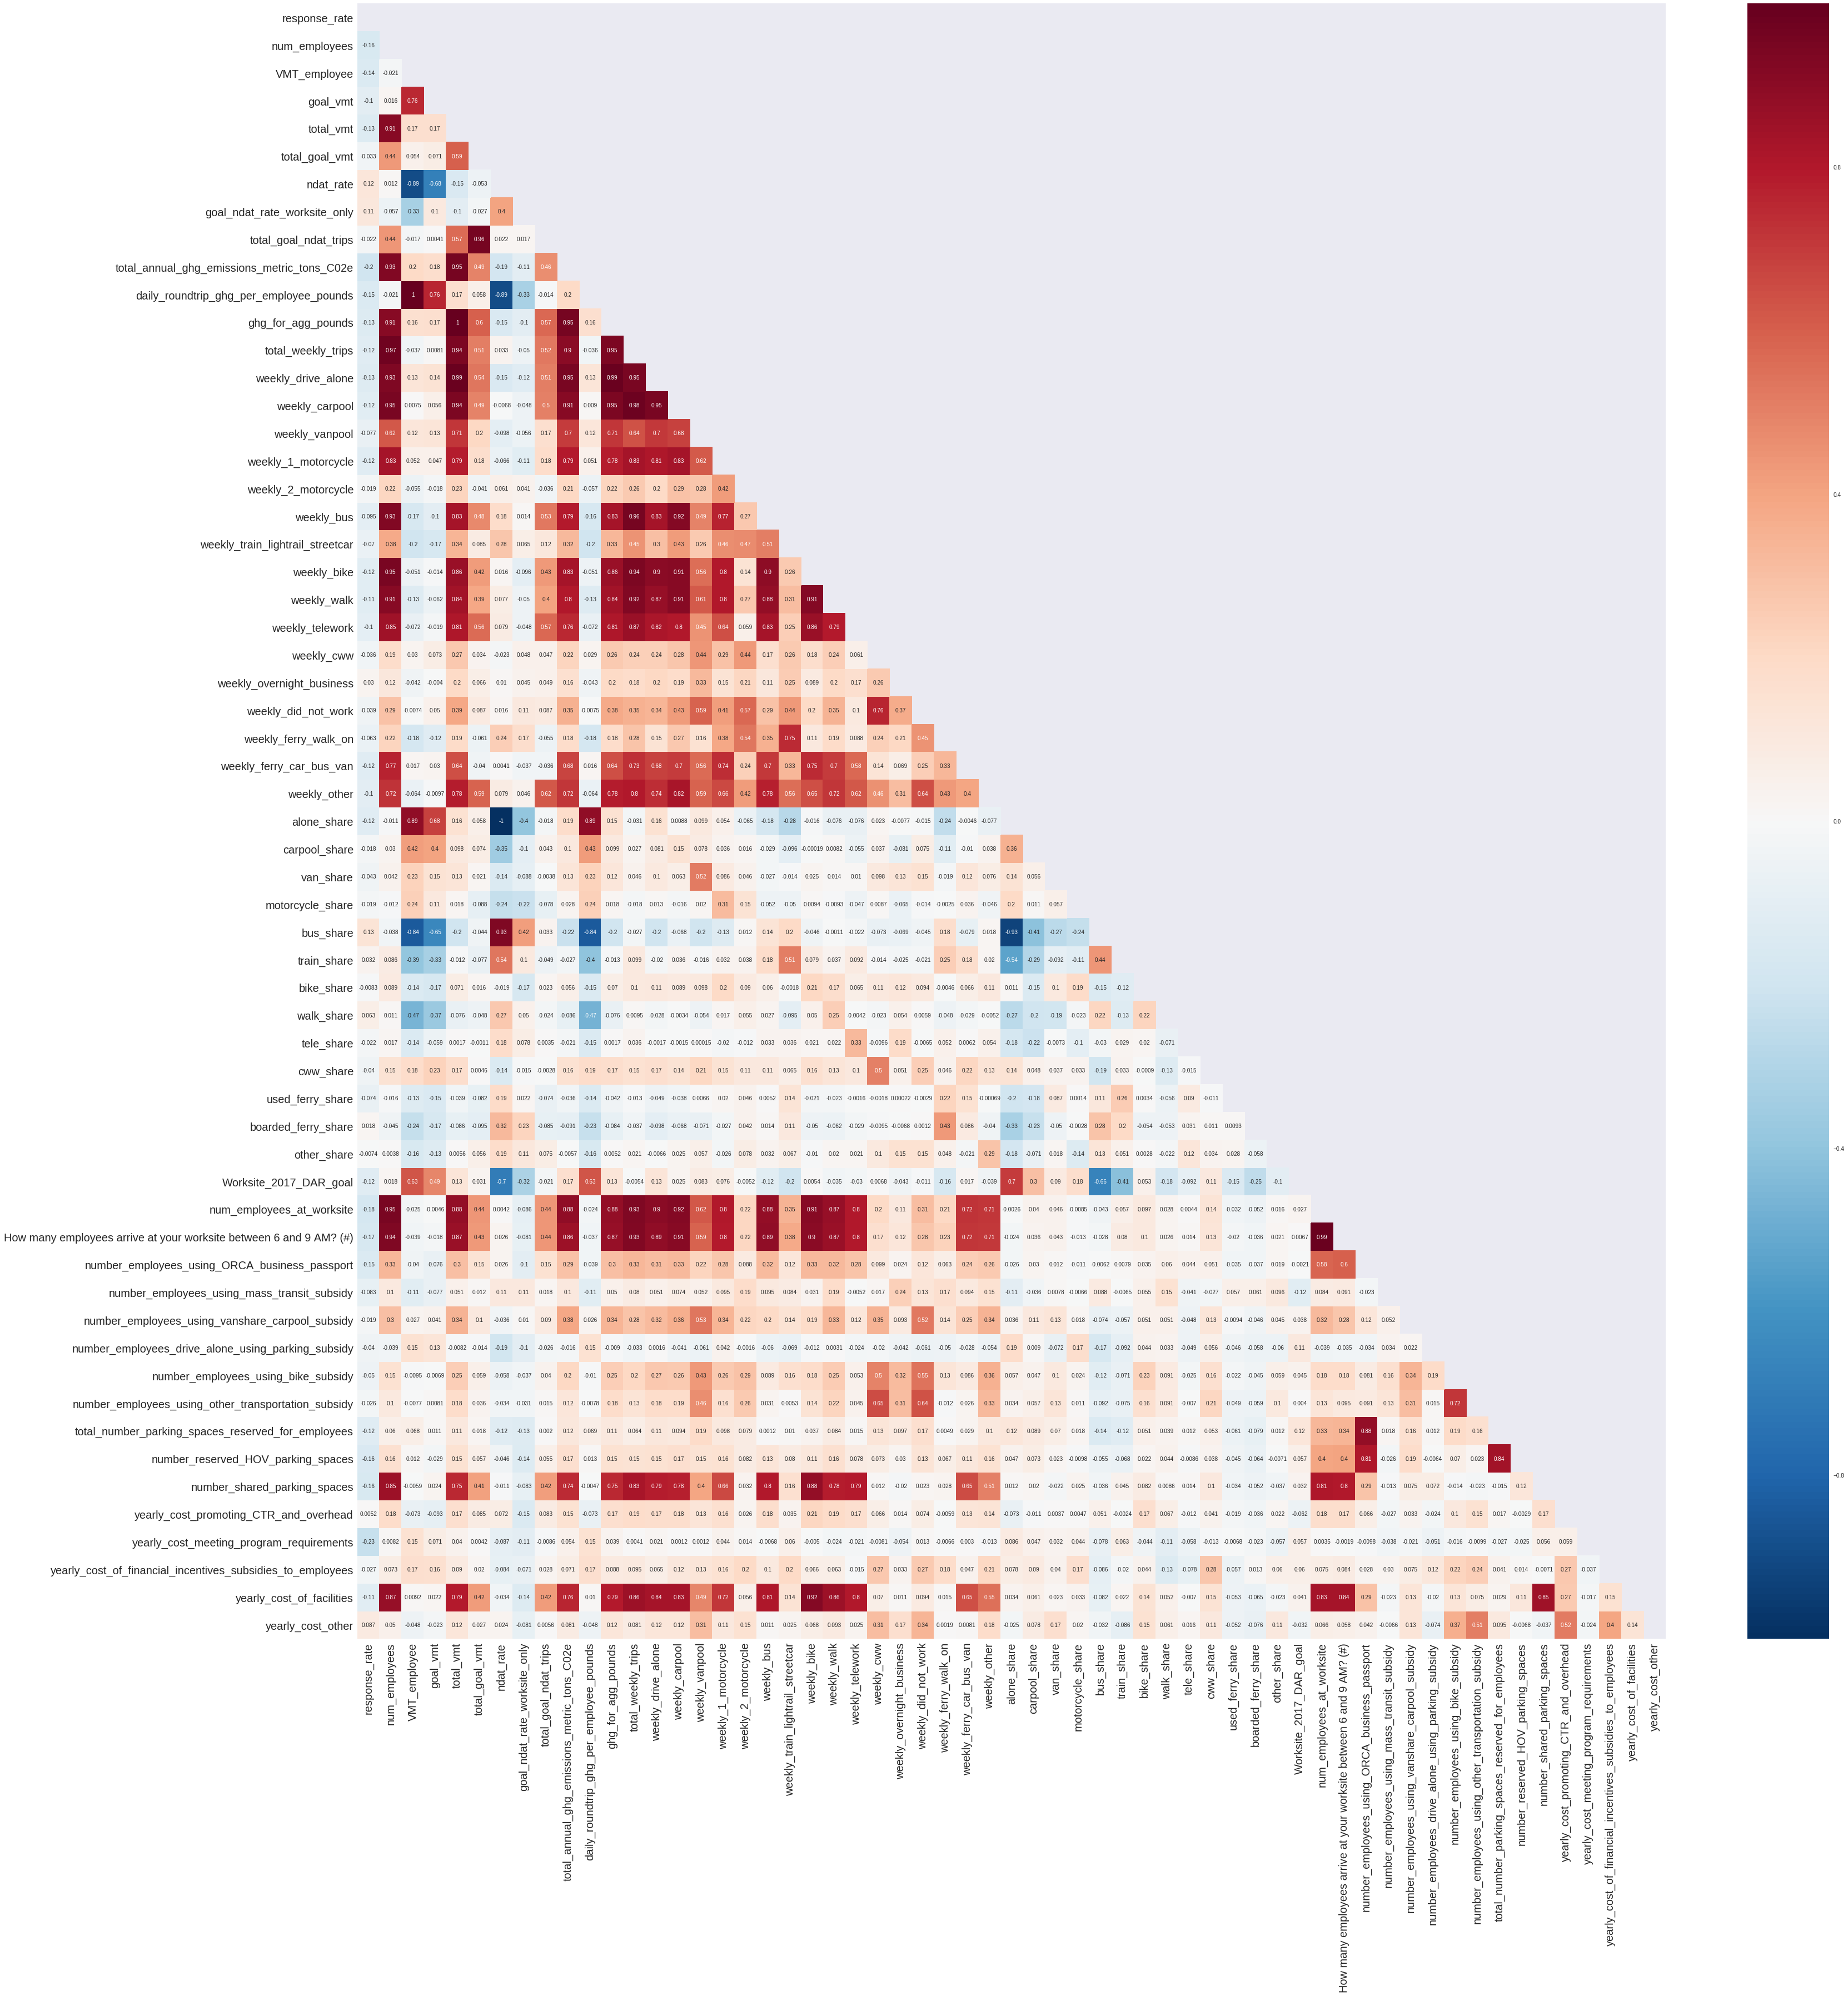

In [38]:
# heat map shows which columns are highly positively correlated (red) and highly negatively correlated (blue).
# if there are columns that are highly correlated, positively or negativel, i can delete one of those columns.
# Set the default matplotlib figure size to :
fix, ax = plt.subplots(figsize=(50, 50))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(commute_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(commute_corr, mask=mask, ax=ax, annot=True)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=20, rotation='vertical')
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=20)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.tight_layout()
_ = plt.show()
plt.savefig('./figures/commute_features_corr.png')
plt.savefig('./figures/commute_features_corr.pdf')